In [ ]:
#Importing dependencies
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras import datasets
%matplotlib inline
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

(3560, 5360, 3)


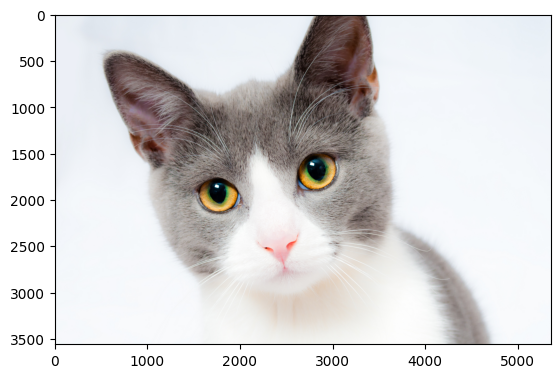

In [ ]:
#read cat image
urllib.request.urlretrieve("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/cat/cat.jpeg", "cat.jpeg")
x=plt.imread('cat.jpeg')
plt.imshow(x)
print(x.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 3556, 5356, 1)       │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


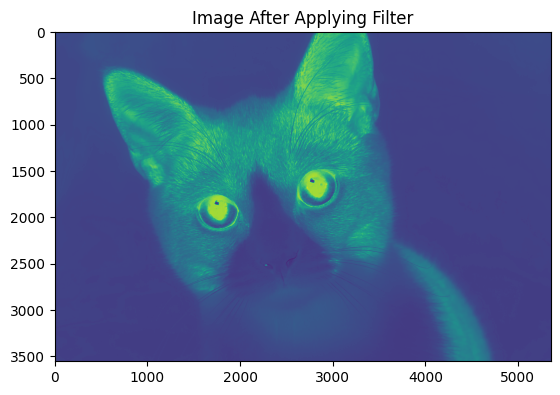

In [ ]:
model=Sequential()
model.add(Conv2D(filters=1, kernel_size=(5,5), input_shape=x.shape, kernel_initializer='random_uniform'))
model.summary()

#Draw CNN Image
batch_value=np.expand_dims(x,axis=0)
batch_value=model.predict(batch_value)
final_image=np.squeeze(batch_value,axis=0)
flat_image=final_image.flatten()
pixels = np.matrix(flat_image)
pixels=pixels.reshape(batch_value.shape[1],batch_value.shape[2])
plt.title("Image After Applying Filter")
plt.imshow(pixels)

In [ ]:
def Visualize(model, cat):
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    print("Shape after pooling ",  conv_cat2.shape)
    plt.imshow(conv_cat2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Shape after pooling  (1779, 2679)
Original Image Shape (3560, 5360, 3)


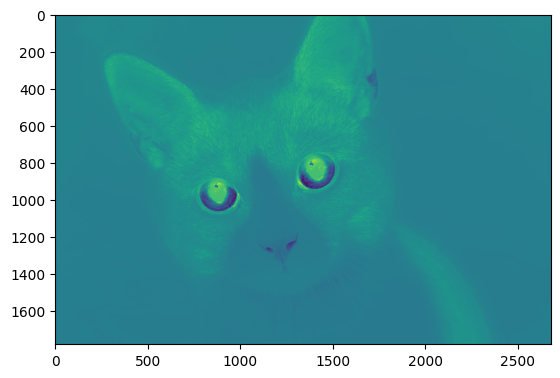

In [ ]:
model=Sequential()
model.add(Conv2D(1,
                 (3,3),
                 input_shape=x.shape,
                ))
model.add(MaxPooling2D(pool_size=(2,2)))

#We visualize change the filter size to see the difference
Visualize(model, x)
print("Original Image Shape",  x.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


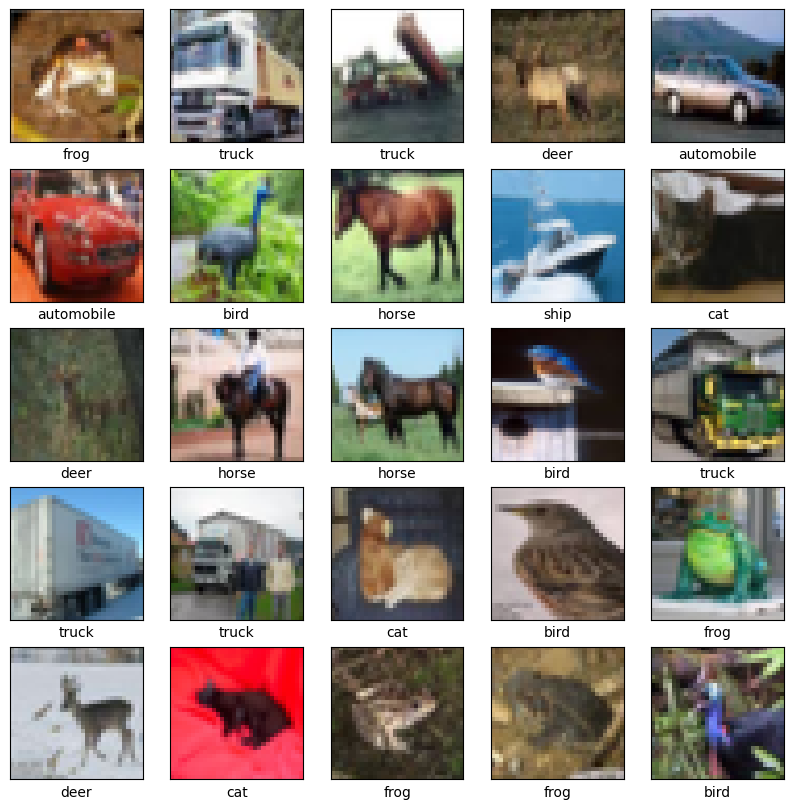

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#For Detecting low level features
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#For Detecting Mid level features - Higher than previous conv layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#High level features - Higher than previous conv layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,682 (158.91 KB)

 Trainable params: 40,682 (158.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=2, batch_size=64,validation_data=(test_images, test_labels))


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.2915 - loss: 1.9003 - val_accuracy: 0.4680 - val_loss: 1.4830
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.4980 - loss: 1.3963 - val_accuracy: 0.5409 - val_loss: 1.2654


In [ ]:
model.save_weights('cifar10_model_v1.weights.h5')

In [ ]:
model.load_weights('cifar10_model_v1.weigths.h5')
model.fit(train_images, train_labels, epochs=2, batch_size=64,
                    validation_data=(test_images, test_labels))

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'cifar10_model_v1.weigths.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/CNN_Model/cifar10_model_v2.h5", "cifar10_model_v2.h5")
model.load_weights("cifar10_model_v2.h5")
model.fit(train_images, train_labels, epochs=2, batch_size=64,
                    validation_data=(test_images, test_labels))

NameError: name 'urllib' is not defined